In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/drive/MyDrive/IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# EDA

Pairplot to visualize relationships between features

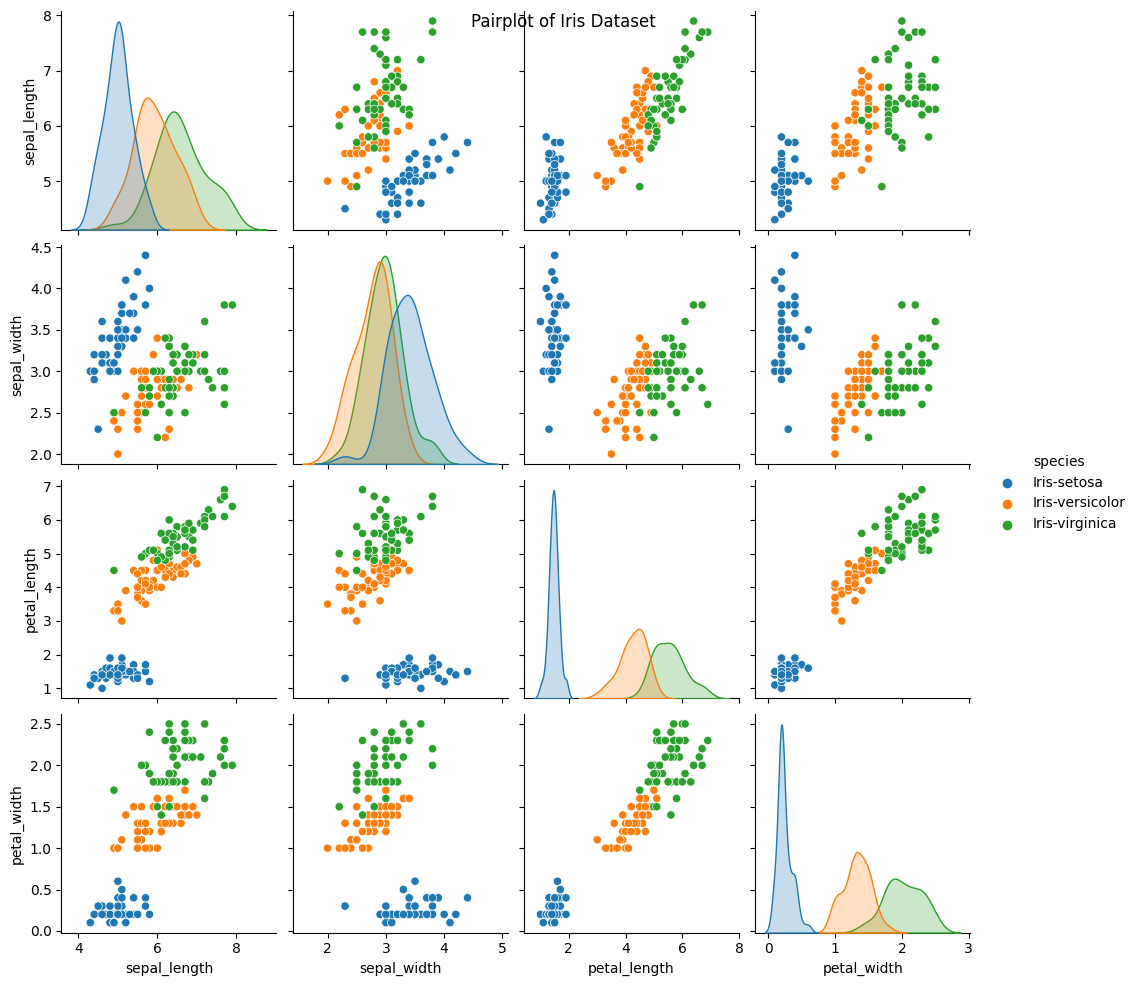

In [6]:
sns.pairplot(df, hue='species')
plt.suptitle('Pairplot of Iris Dataset')
plt.show()

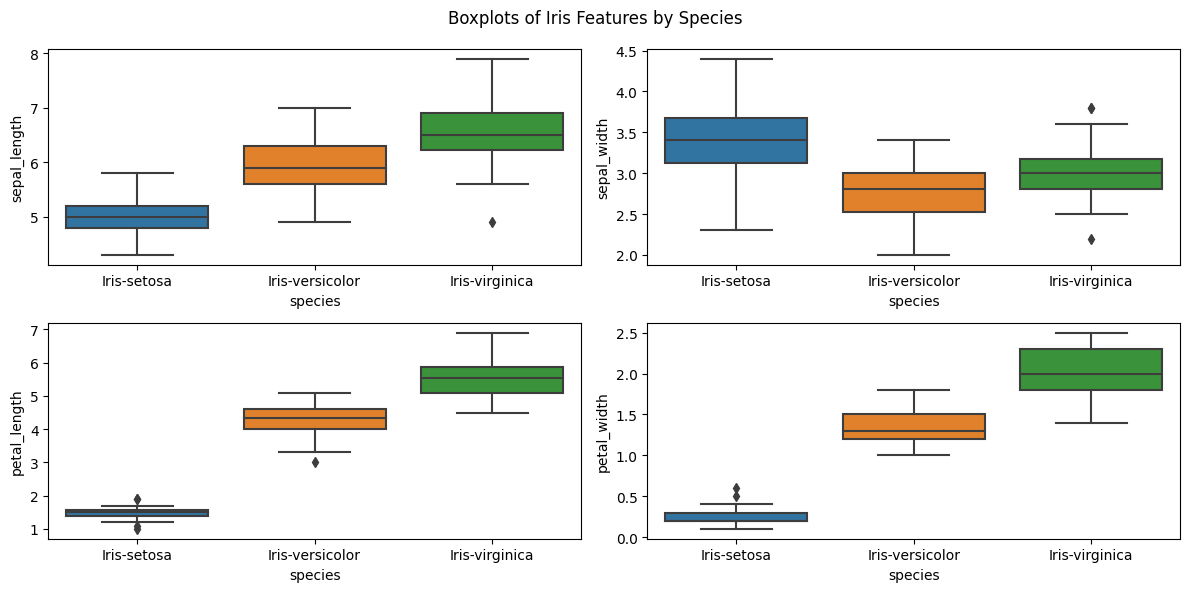

In [7]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=df)

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=df)

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=df)

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=df)

plt.suptitle('Boxplots of Iris Features by Species')
plt.tight_layout()
plt.show()

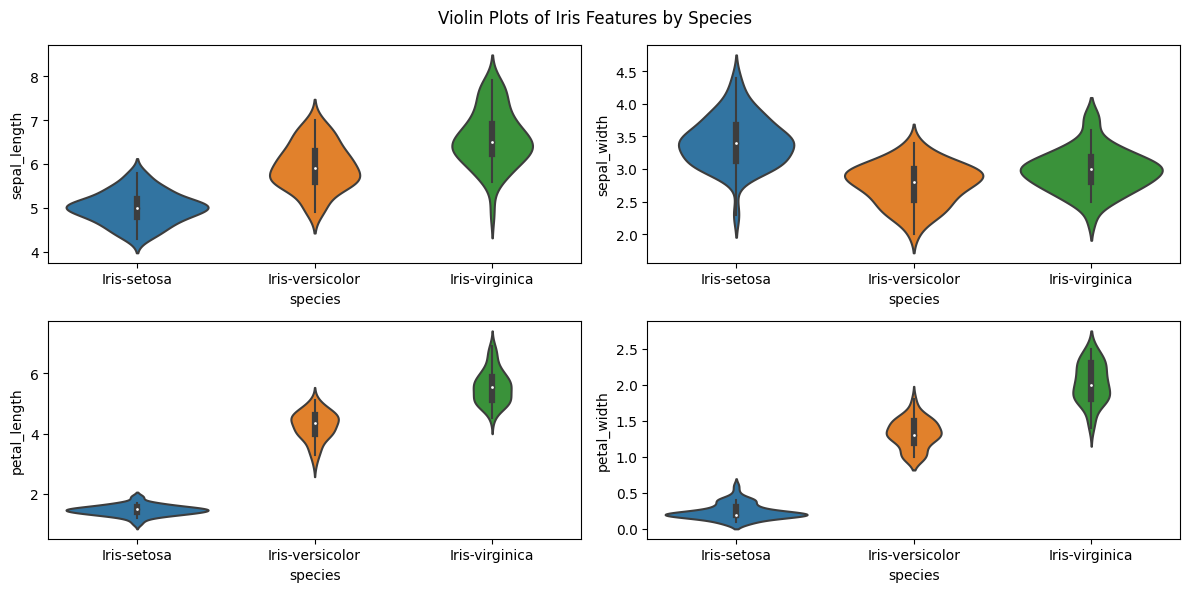

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='sepal_length', data=df)

plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='sepal_width', data=df)

plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='petal_length', data=df)

plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='petal_width', data=df)

plt.suptitle('Violin Plots of Iris Features by Species')
plt.tight_layout()
plt.show()

<ipython-input-9-5be6638d721a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


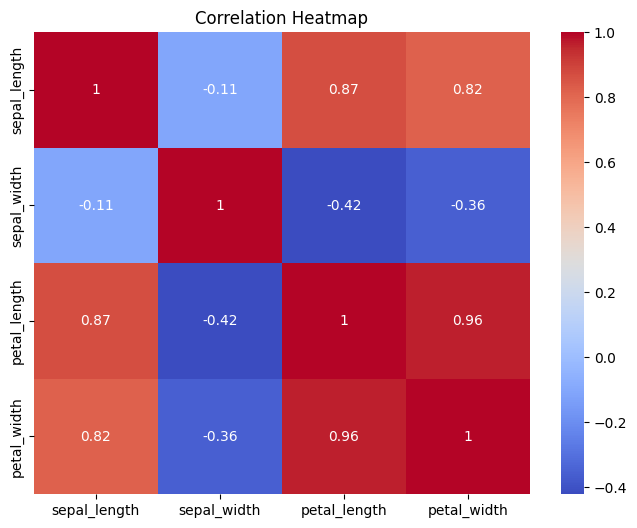

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Make data ready for ML

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X=df.drop('species',axis=1)
y=df['species']

In [14]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [16]:
y = y.map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})


In [17]:
y.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
def apply_classification_models(X, y):
    """
    Apply three different classification models to the dataset.

    Parameters:
        X (pd.DataFrame): Feature matrix
        y (pd.Series): Target variable

    Returns:
        dict: Dictionary containing model names as keys and their accuracy scores as values.
    """
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }

    # Dictionary to store accuracy scores
    accuracy_scores = {}

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Predict the labels for the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[model_name] = accuracy

    return accuracy_scores

In [20]:
apply_classification_models(X, y)

{'Logistic Regression': 1.0, 'Decision Tree': 1.0, 'Random Forest': 1.0}